<a href="https://colab.research.google.com/github/alxkzncoff/skillfactory_rds6_car_price_prediction_ml_dl/blob/main/car_price_ml_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEFINE

In [1]:
# DEFINE
DATA_PATH                   = '/content/drive/My Drive/skill_factory_car_price_prediction_ml_dl'
RANDOM_SEED                 = 42

# IMPORT

In [124]:
# Analyse
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split

In [107]:
train = pd.read_csv(DATA_PATH+'/train.csv')
test = pd.read_csv(DATA_PATH+'/test.csv')

# FEATURES DESCRIBE

- **bodyType** - категориальный
- **brand** - категориальный
- **color** - категориальный
- **description** - текстовый
- **engineDisplacement** - числовой, представленный как текст
- **enginePower** - числовой, представленный как текст
- **fuelType** - категориальный
- **mileage** - числовой
- **modelDate** - числовой
- **model_info** - категориальный
- **name** - категориальный, желательно сократить размерность
- **numberOfDoors** - категориальный
- **price** - числовой, целевой
- **productionDate** - числовой
- **sell_id** - изображение (файл доступен по адресу, основанному на sell_id)
- **vehicleConfiguration** - не используется (комбинация других столбцов)
- **vehicleTransmission** - категориальный
- **Владельцы** - категориальный
- **Владение** - числовой, представленный как текст
- **ПТС** - категориальный
- **Привод** - категориальный
- **Руль** - категориальный

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [5]:
train.head(5)

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль
0,седан,BMW,чёрный,Авто на бодром ходу. Все работает отлично. П...,3.0 LTR,272 N12,бензин,245000,2007,5ER,530xi 3.0 AT (272 л.с.) 4WD,4,599000.0,2007,1099980990,SEDAN AUTOMATIC 3.0,автоматическая,3 или более,NaN,Оригинал,полный,Левый
1,седан,AUDI,серебристый,"Продажа от собственника, второй владелец, ПТС ...",2.8 LTR,204 N12,бензин,183000,2011,A6,2.8 CVT (204 л.с.),4,850000.0,2011,1095836906,SEDAN VARIATOR 2.8,вариатор,2 владельца,8 лет и 6 месяцев,Оригинал,передний,Левый
2,седан,MERCEDES,чёрный,Внимание! Только для клиентов AVILON Автомобил...,3.5 LTR,306 N12,бензин,122733,2009,E_KLASSE,350 3.5 AT (306 л.с.) 4WD,4,1325000.0,2013,1100195530,SEDAN AUTOMATIC 3.5,автоматическая,3 или более,NaN,Оригинал,полный,Левый
3,седан,AUDI,белый,В комплекте зимние колёса. 27.07.2020 Замена п...,2.0 LTR,180 N12,бензин,151000,2011,A6,2.0 CVT (180 л.с.),4,815000.0,2011,1099880662,SEDAN VARIATOR 2.0,вариатор,3 или более,4 года и 9 месяцев,Оригинал,передний,Левый
4,лифтбек,AUDI,белый,"Отличный авто, 2011 года выпуска, кроме передн...",1.8 LTR,160 N12,бензин,140000,2007,A5,1.8 CVT (160 л.с.),5,810000.0,2011,1083244610,LIFTBACK VARIATOR 1.8,вариатор,3 или более,2 года и 9 месяцев,Оригинал,передний,Левый


Построим *наивную* модель, чтобы понять в какую сторону двигаемся - к **улучшению** или к **ухудшению**.

Модель будет предсказывать среднюю цену авто по модели и году выпуска.


In [6]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [7]:
train_data, test_data = train_test_split(train, test_size=0.15, shuffle=True, random_state=RANDOM_SEED)

In [8]:
# Вместо iterrows() лучше всего использовать "Vectorization with Pandas series" и "Vectorization with NumPy arrays", так как
# они работают намного быстрее чем "iterrows()" и "apply()". В данном случае воспользуемся "iterrows()" так как датасет не такой большой.

predicts = []
for index, row in pd.DataFrame(test_data[['model_info', 'productionDate']]).iterrows():
    query = f"model_info == '{row[0]}' and productionDate == '{row[1]}'"
    predicts.append(train_data.query(query)['price'].median())

# заполним не найденные совпадения
predicts = pd.DataFrame(predicts)
predicts = predicts.fillna(predicts.median())

# округлим
predicts = (predicts // 1000) * 1000

#оцениваем точность
print(f"Точность наивной модели по метрике MAPE: {(mape(test_data['price'], predicts.values[:, 0]))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 19.88%


По поводу итераций подробно расписано [здесь](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)

# EDA AND PREPROCCESING

In [66]:
# Анализ признаков
def column_info(column):

  if column.dtype == 'O':
    print(column.describe())
    print('-----------------------------')
    print(column.value_counts())

  else:
    print(column.describe())
    plt.figure(figsize=(20,7))
    sns.histplot(train, x=column)

## bodyType

In [74]:
column_info(train.bodyType)

count      6682
unique       13
top       седан
freq       2844
Name: bodyType, dtype: object
-----------------------------
седан           2844
внедорожник     2320
купе             427
хэтчбек          337
лифтбек          245
универсал        153
минивэн          146
купе-хардтоп      91
родстер           60
кабриолет         44
компактвэн         8
лимузин            5
пикап              2
Name: bodyType, dtype: int64


In [93]:
train.bodyType = train.bodyType.apply(lambda x: x.split()[0])

## brand

In [76]:
column_info(train.brand)

count     6682
unique       3
top        BMW
freq      2805
Name: brand, dtype: object
-----------------------------
BMW         2805
MERCEDES    2294
AUDI        1583
Name: brand, dtype: int64


## color

In [78]:
column_info(train.color)

count       6682
unique        16
top       чёрный
freq        2805
Name: color, dtype: object
-----------------------------
чёрный         2805
белый          1263
серый           733
синий           685
серебристый     341
коричневый      307
красный         203
бежевый          76
голубой          72
зелёный          70
фиолетовый       37
пурпурный        30
оранжевый        22
золотистый       21
жёлтый           16
розовый           1
Name: color, dtype: int64


## engineDisplacement

count    6682.000000
mean        2.782610
std         1.062753
min         0.600000
25%         2.000000
50%         2.800000
75%         3.000000
max         6.600000
Name: engineDisplacement, dtype: float64


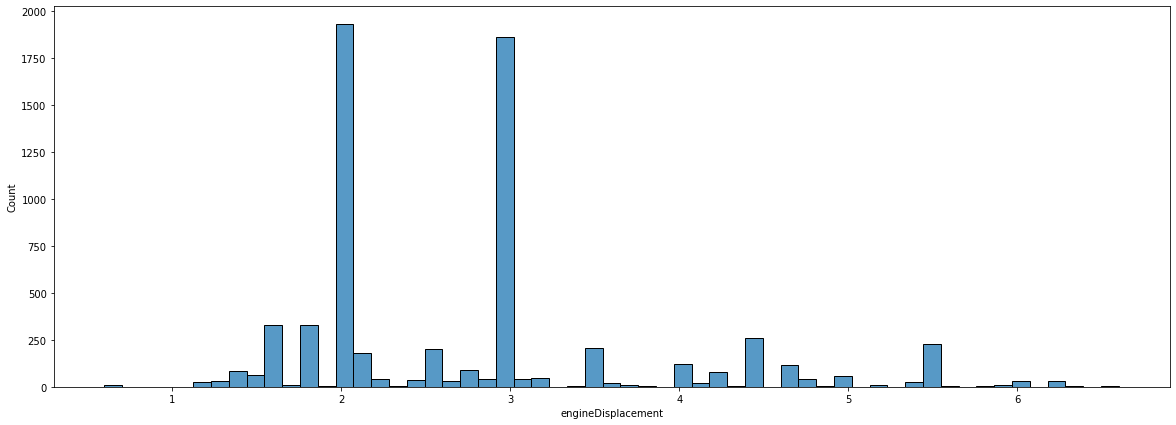

In [110]:
column_info(train.engineDisplacement)

In [81]:
train[train.engineDisplacement=='undefined LTR']

,bodyType,brand,color,description,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_info,name,numberOfDoors,price,productionDate,sell_id,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль
2296,хэтчбек,BMW,чёрный,"Автомобиль в наличии Москве , с ПТС , производ...",undefined LTR,184 N12,электро,9000,2017,I3,S Electro AT (136 кВт),5,2719000.0,2019,1100083262,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый
3725,хэтчбек,BMW,чёрный,"BMW i3 Электромобиль с бензиновым генератором,...",undefined LTR,170 N12,электро,39500,2017,I3,Electro AT (126 кВт),5,2299711.0,2017,1098041130,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,2 года и 11 месяцев,Оригинал,задний,Левый
3726,хэтчбек,BMW,голубой,Прибыло из Америки в августе 20 года. Полная и...,undefined LTR,170 N12,электро,28800,2017,I3,Electro AT (126 кВт),5,2170000.0,2017,1100097316,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый
5862,хэтчбек,BMW,белый,В наличии! Автомобиль куплен в США! Комплектац...,undefined LTR,170 N12,электро,35810,2013,I3,Electro AT (126 кВт),5,1690000.0,2016,1100153696,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый
6283,хэтчбек,BMW,чёрный,Авто в идеальном состоянии\nЕсть REX (range ex...,undefined LTR,170 N12,электро,60000,2013,I3,Electro AT (126 кВт),5,1790000.0,2015,1097395090,HATCHBACK_5_DOORS AUTOMATIC,автоматическая,1 владелец,NaN,Оригинал,задний,Левый


По данным видно, что это электрокары. Гугл говорит, что у модели i3 объем двигателя составляет **0.6**.

In [108]:
train.engineDisplacement[train.engineDisplacement=='undefined LTR'] = '0.6 LTR'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
train.engineDisplacement = train.engineDisplacement.apply(lambda x: x.split()[0])
train.engineDisplacement = train.engineDisplacement.astype('float64')

## enginePower

count    6682.000000
mean      255.788686
std       109.240110
min        75.000000
25%       184.000000
50%       231.000000
75%       306.000000
max       639.000000
Name: enginePower, dtype: float64


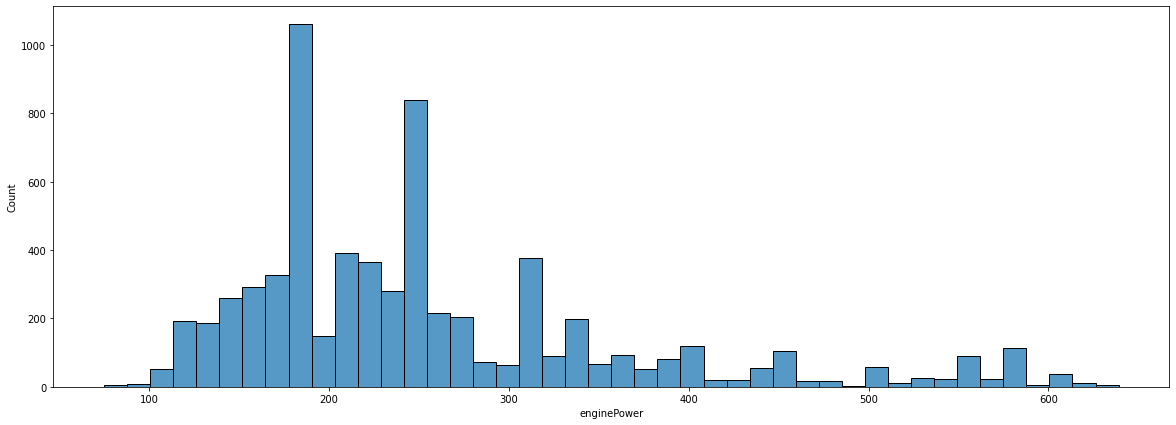

In [113]:
column_info(train.enginePower)

In [112]:
train.enginePower = train.enginePower.apply(lambda x: x.split()[0])
train.enginePower = train.enginePower.astype('float64')

## fuelType

In [114]:
column_info(train.fuelType)

count       6682
unique         4
top       бензин
freq        4804
Name: fuelType, dtype: object
-----------------------------
бензин     4804
дизель     1861
гибрид       12
электро       5
Name: fuelType, dtype: int64


## mileage

count      6682.000000
mean     120522.610895
std       81454.448294
min           1.000000
25%       59181.250000
50%      111000.000000
75%      168000.000000
max      999999.000000
Name: mileage, dtype: float64


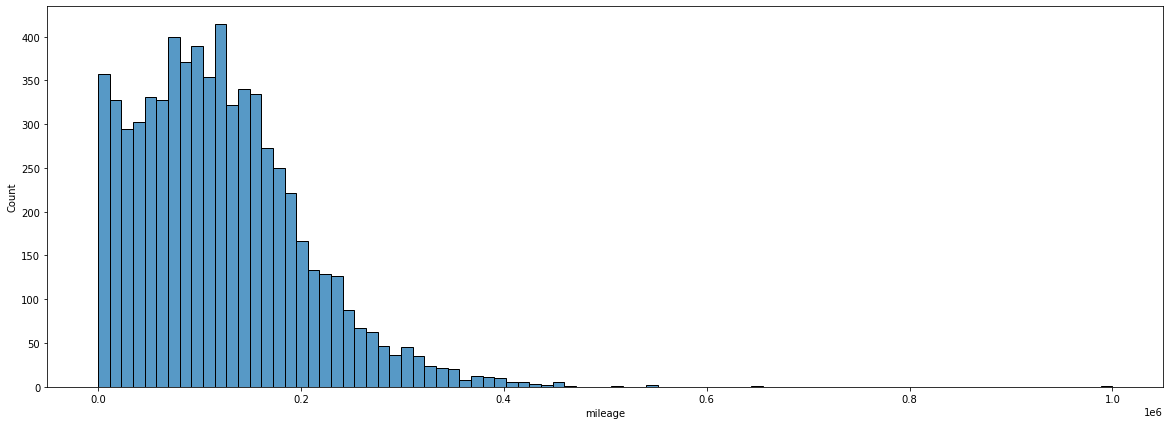

In [115]:
column_info(train.mileage)

## modelDate

count    6682.000000
mean     2010.135588
std         5.370973
min      1975.000000
25%      2007.000000
50%      2011.000000
75%      2014.000000
max      2019.000000
Name: modelDate, dtype: float64


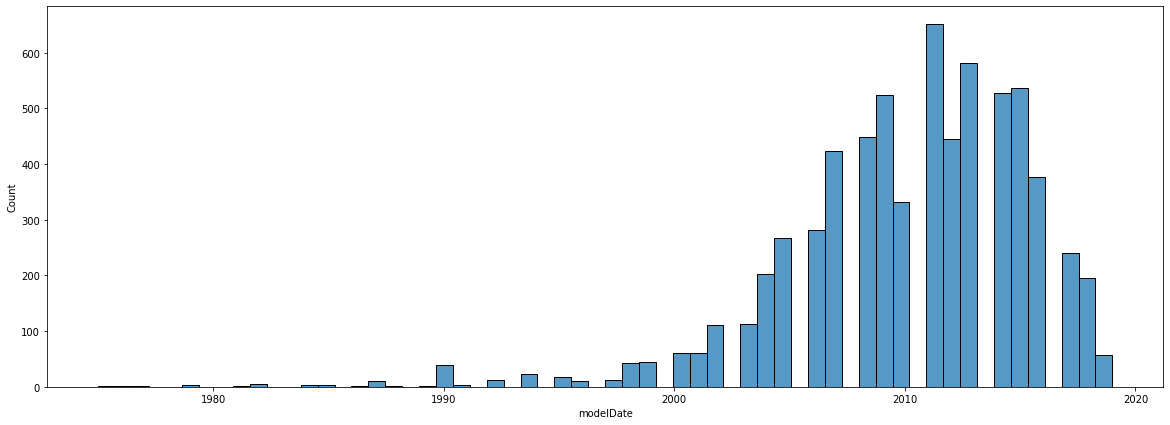

In [116]:
column_info(train.modelDate)

## model_info

In [117]:
column_info(train.model_info)

count     6682
unique     118
top        5ER
freq       611
Name: model_info, dtype: object
-----------------------------
5ER                     611
3ER                     466
E_KLASSE                410
X5                      397
A6                      358
A4                      237
7ER                     229
C_KLASSE                222
X3                      216
X6                      215
S_KLASSE                214
Q7                      170
A5                      150
Q5                      148
1ER                     141
M_KLASSE                135
X1                      122
GL_KLASSE               115
A8                      106
A3                      105
G_KLASSE                 91
6ER                      76
CLS_KLASSE               74
A7                       70
GLK_KLASSE               69
Q3                       66
GLC_KLASSE               61
G_KLASSE_AMG             57
S_KLASSE_AMG             57
X4                       56
V_KLASSE                 55
A_KLASSE  

## name

In [118]:
column_info(train.name)

count                      6682
unique                      900
top       200 2.0 AT (184 л.с.)
freq                        121
Name: name, dtype: object
-----------------------------
200 2.0 AT (184 л.с.)                                121
35i 3.0 AT (306 л.с.) 4WD                            116
2.0 AMT (211 л.с.) 4WD                               113
30d 3.0d AT (249 л.с.) 4WD                            87
400 3.0 AT (333 л.с.) 4WD                             76
520i 2.0 AT (184 л.с.)                                65
2.0 AMT (249 л.с.) 4WD                                65
350 d 3.0d AT (249 л.с.) 4WD                          64
320i xDrive 2.0 AT (184 л.с.) 4WD                     64
200 1.8 AT (184 л.с.)                                 61
2.0 CVT (180 л.с.)                                    61
1.8 CVT (160 л.с.)                                    60
350 3.5 AT (272 л.с.) 4WD                             56
520d 2.0d AT (190 л.с.)                               49
200 2.0 AT (184 л.

In [120]:
train.name[train.brand=='BMW'].value_counts()

35i 3.0 AT (306 л.с.) 4WD                 116
30d 3.0d AT (249 л.с.) 4WD                 87
520i 2.0 AT (184 л.с.)                     65
320i xDrive 2.0 AT (184 л.с.) 4WD          64
520d 2.0d AT (190 л.с.)                    49
3.0i 3.0 AT (231 л.с.) 4WD                 48
30d 3.0d AT (245 л.с.) 4WD                 46
116i 1.6 AT (115 л.с.)                     42
528i xDrive 2.0 AT (245 л.с.) 4WD          42
530d xDrive 3.0d AT (258 л.с.) 4WD         41
520d xDrive 2.0d AT (190 л.с.) 4WD         41
4.4 AT (555 л.с.) 4WD                      39
320i 2.0 AT (156 л.с.)                     39
320i 2.0 AT (184 л.с.)                     38
20d xDrive 2.0d AT (190 л.с.) 4WD          36
40d 3.0d AT (313 л.с.) 4WD                 35
318i 2.0 AT (136 л.с.)                     34
325i 2.5 AT (218 л.с.)                     34
18i 2.0 AT (150 л.с.)                      33
4.4 AT (575 л.с.) 4WD                      33
40d 3.0d AT (306 л.с.) 4WD                 32
20d 2.0d AT (177 л.с.) 4WD        

In [122]:
BMW = train[train.brand=='BMW']

нужно воспользоваться регулярными выражениями